# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nadia Chairunnisa
- **Email:** nadiaoyi@gmail.com
- **ID Dicoding:** nadiaoyi02

## Menentukan Pertanyaan Bisnis

- Pada musim apakah terdapat penyewaan sepeda terbanyak?
- Bagaimana pengaruh cuaca terhadap penyewaan sepeda?
- Apa perbedaan tren pengguna  saat menggunakan sepeda  pada hari kerja, hari libur, dan hari kerja?

## Import Semua Packages/Library yang Digunakan

In [2]:
# Memanggil library yang akan digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
# Mengumpulkan dan menampilkan data hari pada dataset Bike Sharing
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assesing Data

In [4]:
# Memeriksa tipe data data dari tiap kolom pada data day
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# Menampilkan informasi terkait jumlah missing values yang terdapat dalam setiap kolom pada data day
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# Memeriksa duplikasi data pada data day
print("Jumlah duplikasi: ", day_df.duplicated().sum()) 

Jumlah duplikasi:  0


In [7]:
# Menampilkan ringkasan parameter statistik (mean, median, dll.) dari data day
day_df.describe() 

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

Disini akan dilakukan pembersihan pada data meliputi:
- mengubah nama kolom agar mudah dibaca
- mengubah tipe data yang tidak sesuai dengan namanya
- proses konversi dari data int menjadi data kategorikal pada kolom season, month, weekday, weathersit dan working day agar mudah dimengerti.

In [8]:
# Mengubah nama kolom pada data day
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'hum': 'humidity',
    'cnt':'count_rent'
    }, inplace=True)
day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count_rent
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
# Mengubah tipe data kolom dateday dari object menjadi datetime
day_df['dateday'] = pd.to_datetime(day_df['dateday'])

In [10]:
# Proses konversi dari data int menjadi data kategorikal
# columns = ['season', 'month', 'weekday', 'weathersit', 'workingday']
 
# for column in columns:
#     day_df[column] =  day_df[column].astype("category")

# # Mengonversi nilai dari kolom season :
# day_df['season'] = day_df['season'].map({
#     1: 'Spring',
#     2: 'Summer',
#     3: 'Fall',
#     4: 'Winter'
# })

# # Mengonversi nilai dari kolom month :
# day_df['month'] = day_df['month'].map({
#     1: 'Jan',
#     2: 'Feb',
#     3: 'Mar',
#     4: 'Apr',
#     5: 'May',
#     6: 'Jun',
#     7: 'Jul',
#     8: 'Aug',
#     9: 'Sep',
#     10: 'Oct',
#     11: 'Nov',
#     12: 'Dec'
# })

# # Mengonversi nilai dari kolom weekday :
# day_df['weekday'] = day_df['weekday'].map({
#     0: 'Sun',
#     1: 'Mon',
#     2: 'Tue',
#     3: 'Wed',
#     4: 'Thu',
#     5: 'Fri',
#     6: 'Sat'
# })
# # Mengonversi nilai dari kolom weathersit
# day_df['weathersit'] = day_df['weathersit'].map({
#     1: 'Clear',
#     2: 'Misty',
#     3: 'Light Rain/Snow',
#     4: 'Severe Weather'
# })

# # Konversi nilai dari kolom workingday
# day_df['workingday'] = day_df['workingday'].map({
#     0: 'No',
#     1: 'Yes',
# })

In [11]:
# Proses konversi dari data int menjadi data kategorikal
# Mengonversi nilai dari kolom season :
day_df.season.replace((1,2,3,4), 
                    ('Spring','Summer','Fall','Winter'), 
                    inplace=True)
# Mengonversi nilai dari kolom month :
day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),
                    ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), 
                    inplace=True)
# Mengonversi nilai dari kolom weekday :
day_df.weekday.replace((0,1,2,3,4,5,6),
                        ('Sun','Mon','Tue','Wed','Thu','Fri','Sat'),
                        inplace=True)
# Mengonversi nilai dari kolom weathersit
day_df.weathersit.replace((1,2,3,4),
                        ('Clear','Misty','Light Rain/Snow','Severe Weather'),
                        inplace=True)
# Mengonversi nilai dari kolom workingday
day_df.workingday.replace((0,1),('No','Yes'), inplace=True)

In [12]:
# Menampilkan hasil cleaning data
day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count_rent
0,1,2011-01-01,Spring,0,Jan,0,Sat,No,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,Jan,0,Sun,No,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,Jan,0,Mon,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,Jan,0,Tue,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,Jan,0,Wed,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Exploratory Data Analysis (EDA)

In [13]:
# Melihat rangkuman parameter statistik dari data day_df
day_df.describe(include="all")

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count_rent
count,731.000000,731,731,731.000000,731,731.000000,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,12,NaN,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,Jan,NaN,Sat,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,62,NaN,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,0.500684,NaN,0.028728,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,1.000000,NaN,0.000000,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,1.000000,NaN,0.000000,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [14]:
# Melihat jumlah penyewaan terbanyak di musim apa
day_df.groupby(by="season").count_rent.sum().sort_values(ascending=False).reset_index().head(10)

,season,count_rent
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


In [15]:
# Melihat jumlah penyewa berdasarkan cuaca
day_df.groupby(by='weathersit').agg({
    'count_rent': ['max', 'min', 'mean', 'sum']
})

count_rent                           
                       max  min         mean      sum
weathersit                                           
Clear                 8714  431  4876.786177  2257952
Light Rain/Snow       4639   22  1803.285714    37869
Misty                 8362  605  4035.862348   996858

In [16]:
# Melihat jumlah penyewa pada hari libur
day_df.groupby(by='holiday').agg({
    'count_rent': ['max', 'min', 'mean', 'sum']
})

count_rent                            
               max   min         mean      sum
holiday                                       
0             8714    22  4527.104225  3214244
1             7403  1000  3735.000000    78435

In [17]:
# Melihat jumlah penyewa per hari dalam seminggu
day_df.groupby(by='weekday').agg({
    'count_rent':['max','min','mean']
})

count_rent                   
               max   min         mean
weekday                              
Fri           8362  1167  4690.288462
Mon           7525    22  4338.123810
Sat           8714   627  4550.542857
Sun           8227   605  4228.828571
Thu           7804   431  4667.259615
Tue           7767   683  4510.663462
Wed           8173   441  4548.538462

In [18]:
# Melihat jumlah penyewa pada hari kerja
day_df.groupby(by='workingday').agg({
    'count_rent': ['max', 'min', 'mean']
})

count_rent                  
                  max  min         mean
workingday                             
No               8714  605  4330.168831
Yes              8362   22  4584.820000

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada musim apakah terdapat penyewaan sepeda terbanyak?

C:\Users\Dell\AppData\Local\Temp\ipykernel_20432\3195957451.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


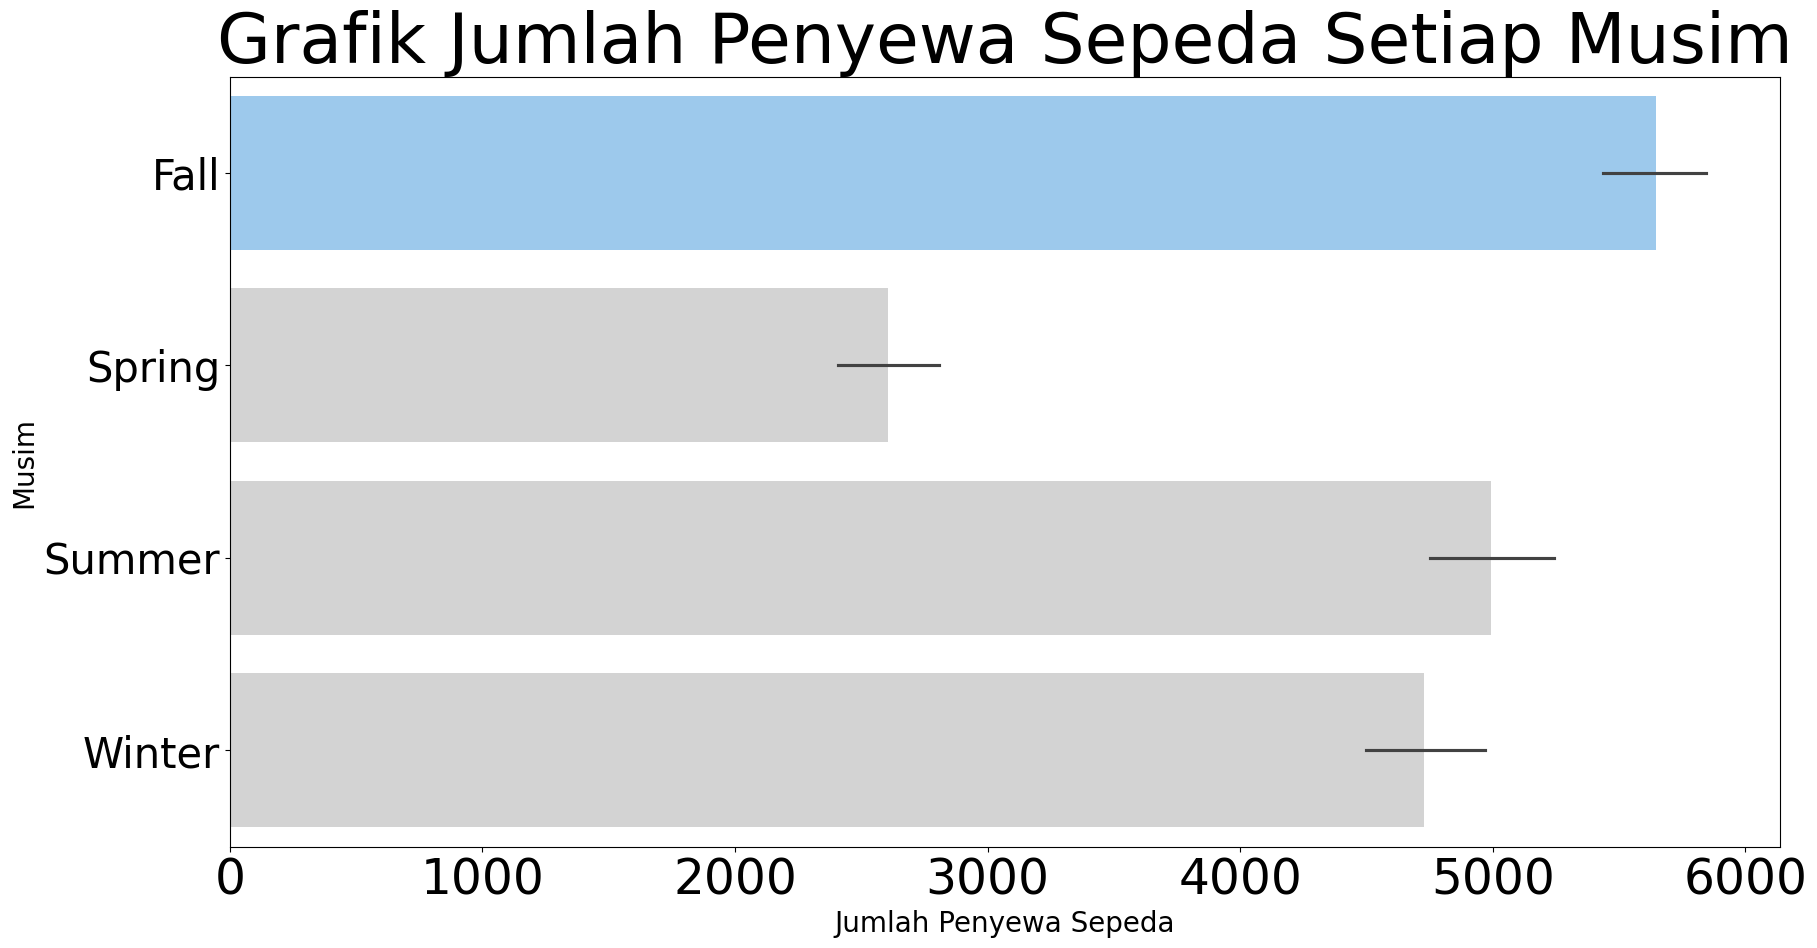

In [19]:
# Mengatur warna pada grafik
colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Membuat subplot dengan 1 baris dan 1 kolom, dengan ukuran (20, 10)
fig, ax = plt.subplots(figsize=(20, 10))

# Membuat barplot untuk y="season" dan x="count_rent", menggunakan data=day_df
sns.barplot(
        x="count_rent",
        y="season",
        data=day_df.sort_values(by="season", ascending=True),
        palette=colors,
        ax=ax
    )

# mengatur judul, label y dan x, serta tick params untuk subplot tersebut
plt.title('Grafik Jumlah Penyewa Sepeda Setiap Musim', fontsize=50)
plt.xlabel('Jumlah Penyewa Sepeda', fontsize=20)
plt.ylabel('Musim', fontsize=20)
plt.tick_params(axis='x', labelsize=35)
plt.tick_params(axis='y', labelsize=30)

# Menampilkan grafik
plt.show()

Berdasarkan grafik di atas, jumlah penyewa terbanyak terdapat pada saat Musim Fall (Gugur) dengan jumlah penyewa sebanyak 1061129

### Pertanyaan 2: Bagaimana pengaruh cuaca terhadap penyewaan sepeda?

C:\Users\Dell\AppData\Local\Temp\ipykernel_20432\2436153131.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


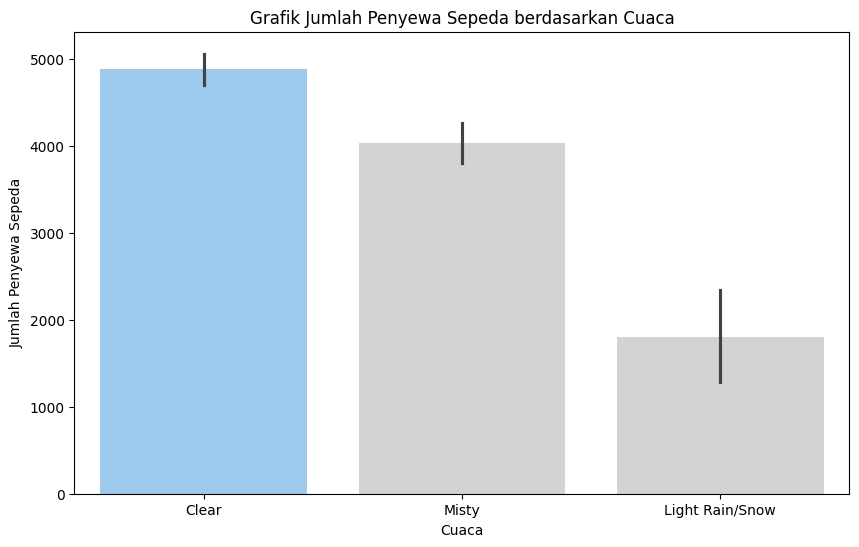

In [24]:
colors = ["#90CAF9", "#D3D3D3", "#D3D3D3"]
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(
    x='weathersit',
    y='count_rent',
    data=day_df.sort_values(by="season", ascending=True),
    palette=colors,
    ax=ax)

plt.title('Grafik Jumlah Penyewa Sepeda berdasarkan Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.show()

Berdasarkan grafik di atas, cuaca sangat berpengaruh terhadap jumlah penyewaan sepeda dimana pada saat cuaca cerah tentunya memiliki jumlah penyewa terbanyak dan diikuti dengan cuaca berkabut/mendung dan yang terakhir dengan jumlah penyewa yang paling sedikit terdapat pada saat cuaca sedang hujan/bersalju.

### Pertanyaan 3: Apa perbedaan tren pengguna  saat menggunakan sepeda  pada hari kerja, hari libur, dan hari kerja?

C:\Users\Dell\AppData\Local\Temp\ipykernel_20432\2418495466.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Dell\AppData\Local\Temp\ipykernel_20432\2418495466.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Dell\AppData\Local\Temp\ipykernel_20432\2418495466.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


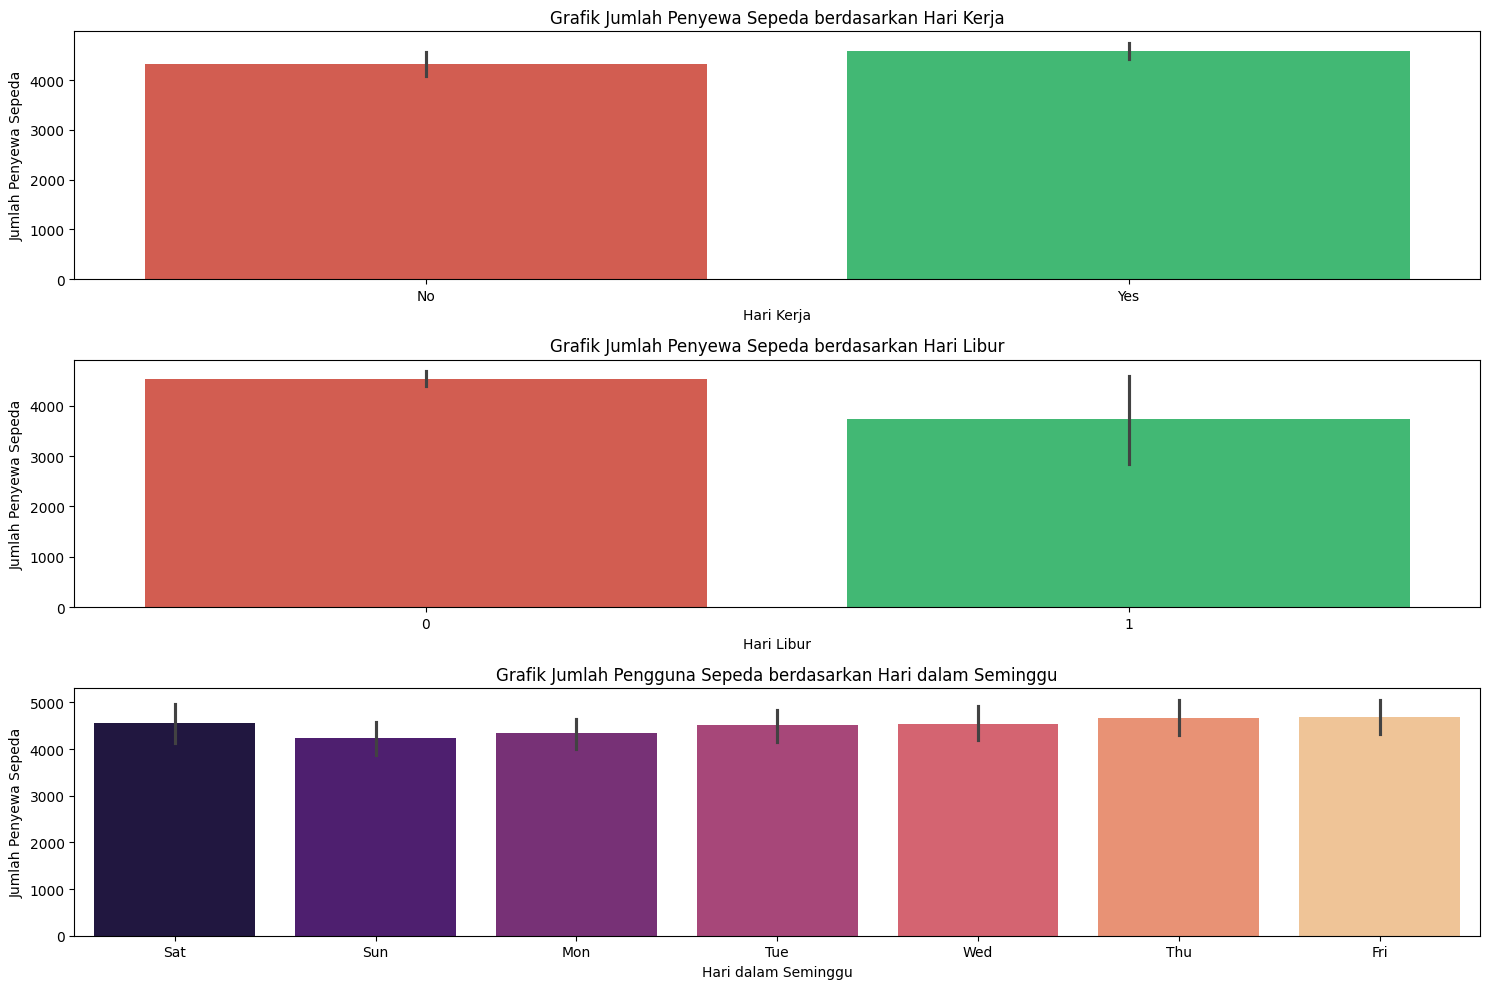

In [21]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

# Membuat grafik jumlah penyewa sepeda berdasarkan workingday (hari kerja)
sns.barplot(
    x='workingday',
    y='count_rent',
    data=day_df,
    ax=ax[0],
    palette=['#e74c3c', '#2ecc71'])
ax[0].set_title('Grafik Jumlah Penyewa Sepeda berdasarkan Hari Kerja')
ax[0].set_xlabel('Hari Kerja')
ax[0].set_ylabel('Jumlah Penyewa Sepeda')

# Membuat grafik jumlah penyewa sepeda berdasarkan holiday (hari libur)
sns.barplot(
    x='holiday',
    y='count_rent',
    data=day_df,
    ax=ax[1],
    palette=['#e74c3c', '#2ecc71'])
ax[1].set_title('Grafik Jumlah Penyewa Sepeda berdasarkan Hari Libur')
ax[1].set_xlabel('Hari Libur')
ax[1].set_ylabel('Jumlah Penyewa Sepeda')

# Membuat grafik jumlah penyewa sepeda berdasarkan berdasarkan weekday (hari dalam seminggu)
sns.barplot(
    x='weekday',
    y='count_rent',
    data=day_df,
    ax=ax[2],
    palette='magma')
ax[2].set_title('Grafik Jumlah Pengguna Sepeda berdasarkan Hari dalam Seminggu')
ax[2].set_xlabel('Hari dalam Seminggu')
ax[2].set_ylabel('Jumlah Penyewa Sepeda')

plt.tight_layout()
plt.show()

Berdasarkan grafik di atas, dapat disimpulkan bahwa:
- Jumlah penyewa terbanyak terdapat pada hari kerja dimana hari kerja meliputi dari hari Senin-Jumat, sedangkan hari tidak kerja (hari libur/weekend) yaitu hari Sabtu-Minggu
- Jumlah penyewa terbanyak pada hari biasa (tidak libur) dibandingkan hari libur
- Hari Jumat menunjukkan jumlah terbanyak dibanding hari lainnya dalam seminggu, sedangkan hari minggu memiliki jumlah penyewa paling sedikit

## Conclusion

1. Berdasarkan grafik di atas, jumlah penyewa terbanyak terdapat pada saat Musim Fall (Gugur) dengan jumlah penyewa sebanyak 1061129
2. Berdasarkan grafik di atas, cuaca sangat berpengaruh terhadap jumlah penyewaan sepeda dimana pada saat cuaca cerah tentunya memiliki jumlah penyewa terbanyak dan diikuti dengan cuaca berkabut/mendung dan yang terakhir dengan jumlah penyewa yang paling sedikit terdapat pada saat cuaca sedang hujan/bersalju.
3. Berdasarkan grafik di atas, dapat disimpulkan bahwa:
- Jumlah penyewa terbanyak terdapat pada hari kerja dimana hari kerja meliputi dari hari Senin-Jumat, sedangkan hari tidak kerja (hari libur/weekend) yaitu hari Sabtu-Minggu
- Jumlah penyewa terbanyak pada hari biasa (tidak libur) dibandingkan hari libur
- Hari Jumat menunjukkan jumlah terbanyak dibanding hari lainnya dalam seminggu, sedangkan hari minggu memiliki jumlah penyewa paling sedikit

In [22]:
day_df.to_csv("dashboard/all_data.csv", index=False)